In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Documents\Assigments\Housing.csv')

In [2]:
# Display first few rows, summary statistics, and data types
print(df.head())
print(df.describe())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [3]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
# Convert categorical variables to numerical values
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [5]:
# Check data types
print(df.dtypes)

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [6]:
# Summary statistics for numeric features
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

In [7]:
# More detailed statistical summary
stats_summary = df.agg({
    'price': ['mean', 'median', 'std', 'min', 'max'],
    'area': ['mean', 'median', 'std', 'min', 'max'],
    'bedrooms': ['mean', 'median', 'std', 'min', 'max'],
    'bathrooms': ['mean', 'median', 'std', 'min', 'max'],
    'stories': ['mean', 'median', 'std', 'min', 'max']
})
print(stats_summary)

               price          area  bedrooms  bathrooms   stories
mean    4.766729e+06   5150.541284  2.965138   1.286239  1.805505
median  4.340000e+06   4600.000000  3.000000   1.000000  2.000000
std     1.870440e+06   2170.141023  0.738064   0.502470  0.867492
min     1.750000e+06   1650.000000  1.000000   1.000000  1.000000
max     1.330000e+07  16200.000000  6.000000   4.000000  4.000000


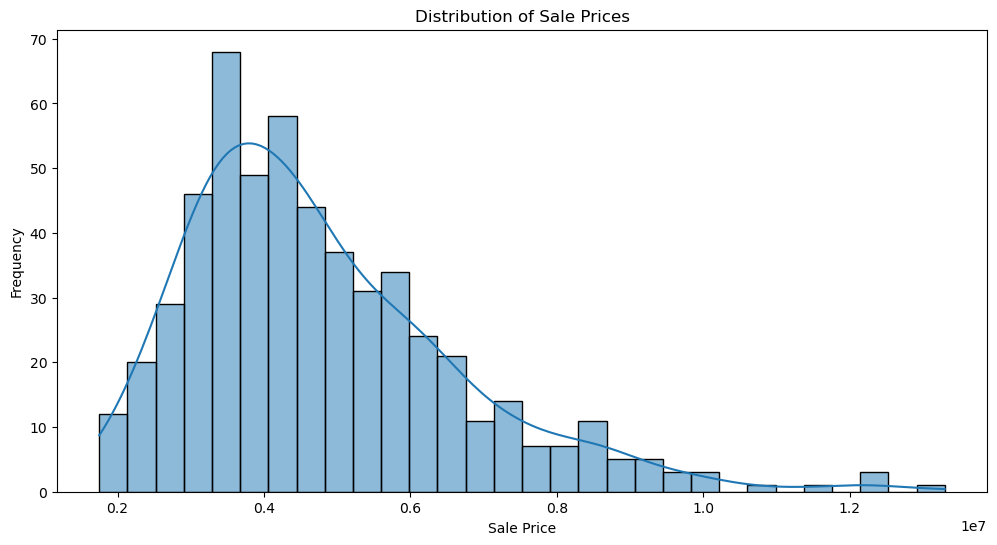

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Sale Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

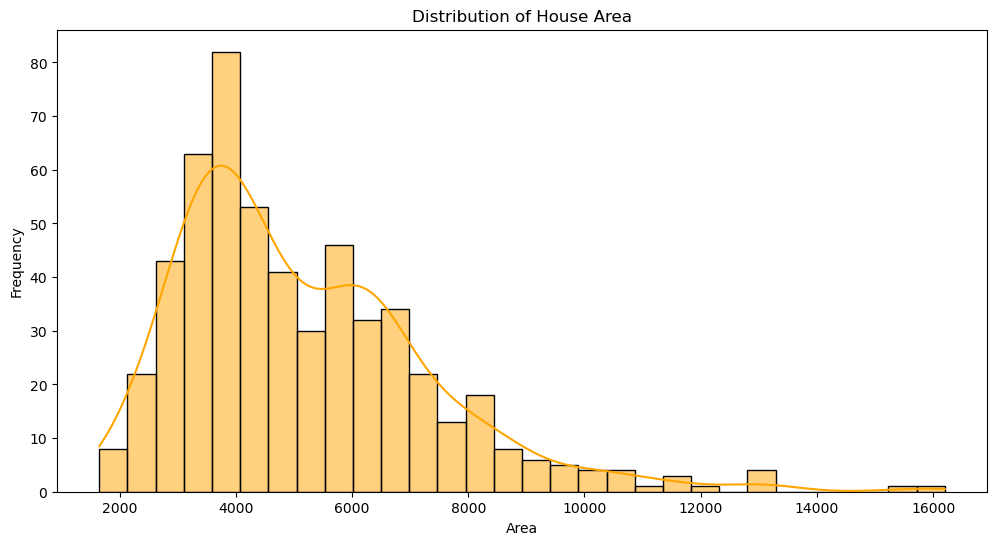

In [9]:
# Histogram of House Area
plt.figure(figsize=(12, 6))
sns.histplot(df['area'], bins=30, kde=True, color='orange')
plt.title('Distribution of House Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

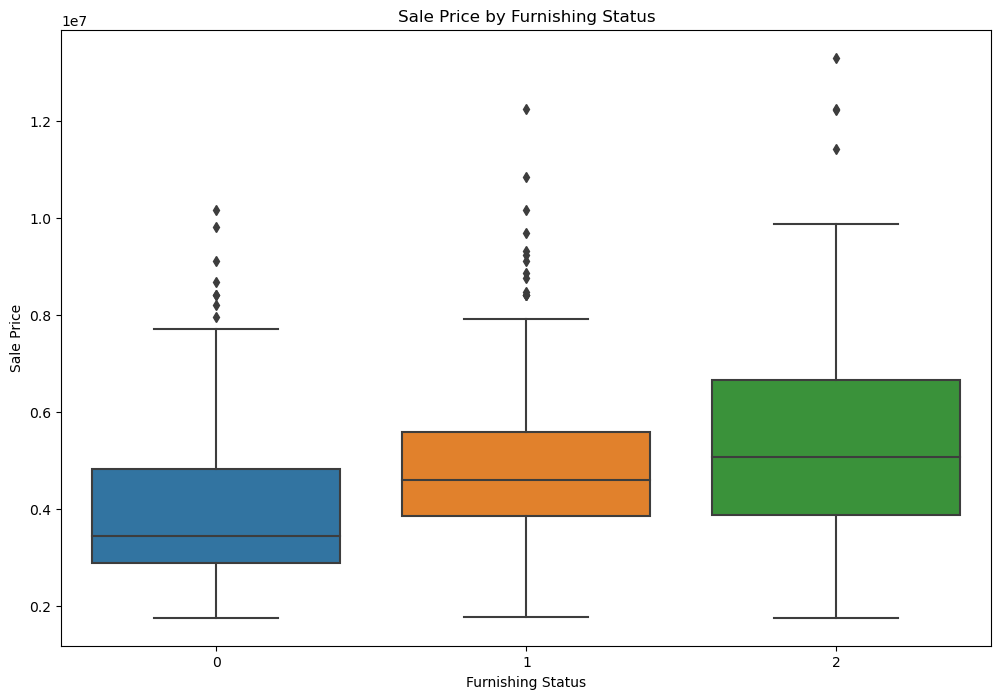

In [10]:
# Box Plot of Sale Price by Furnishing Status
plt.figure(figsize=(12, 8))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Sale Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Sale Price')
plt.show()

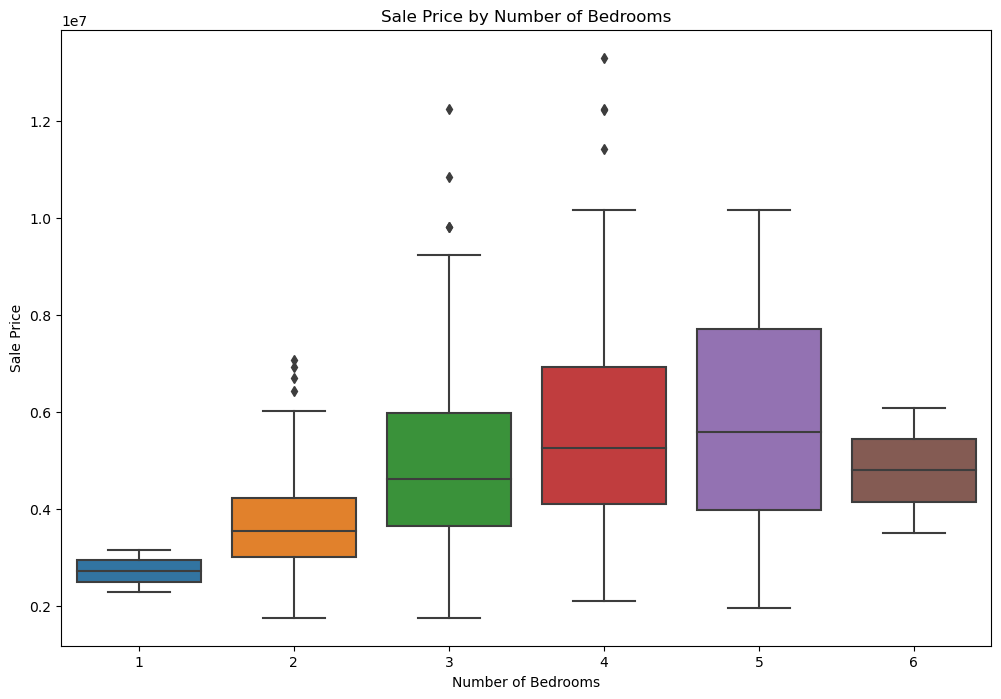

In [11]:
# Box Plot of Sale Price by Number of Bedrooms
plt.figure(figsize=(12, 8))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Sale Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

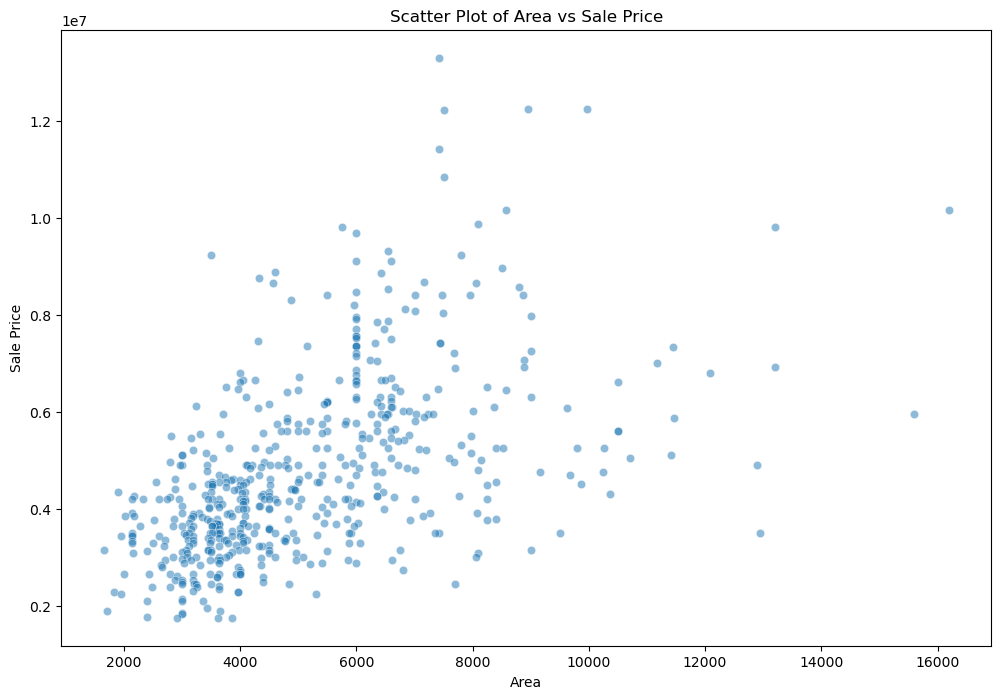

In [12]:
# Scatter Plot of Area vs Sale Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='area', y='price', data=df, alpha=0.5)
plt.title('Scatter Plot of Area vs Sale Price')
plt.xlabel('Area')
plt.ylabel('Sale Price')
plt.show()

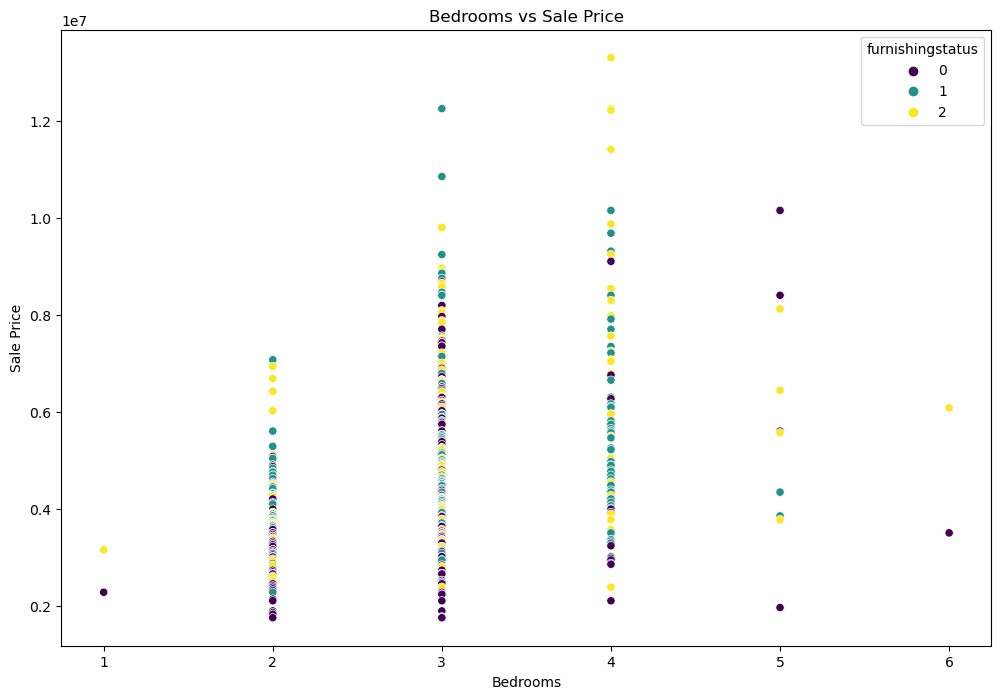

In [13]:
# Scatter Plot of Bedrooms vs Sale Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bedrooms', y='price', data=df, hue='furnishingstatus', palette='viridis')
plt.title('Bedrooms vs Sale Price')
plt.xlabel('Bedrooms')
plt.ylabel('Sale Price')
plt.show()

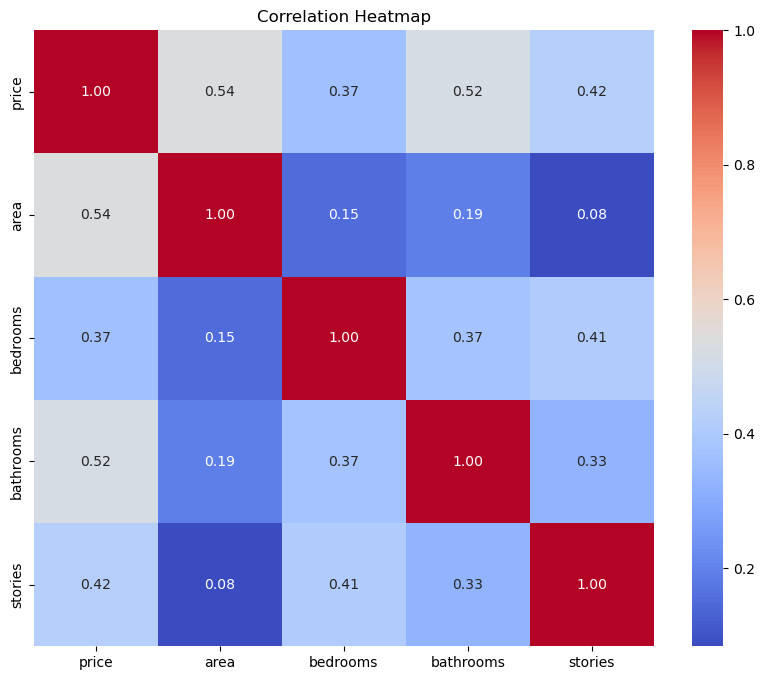

In [14]:
# Compute the correlation matrix
corr = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


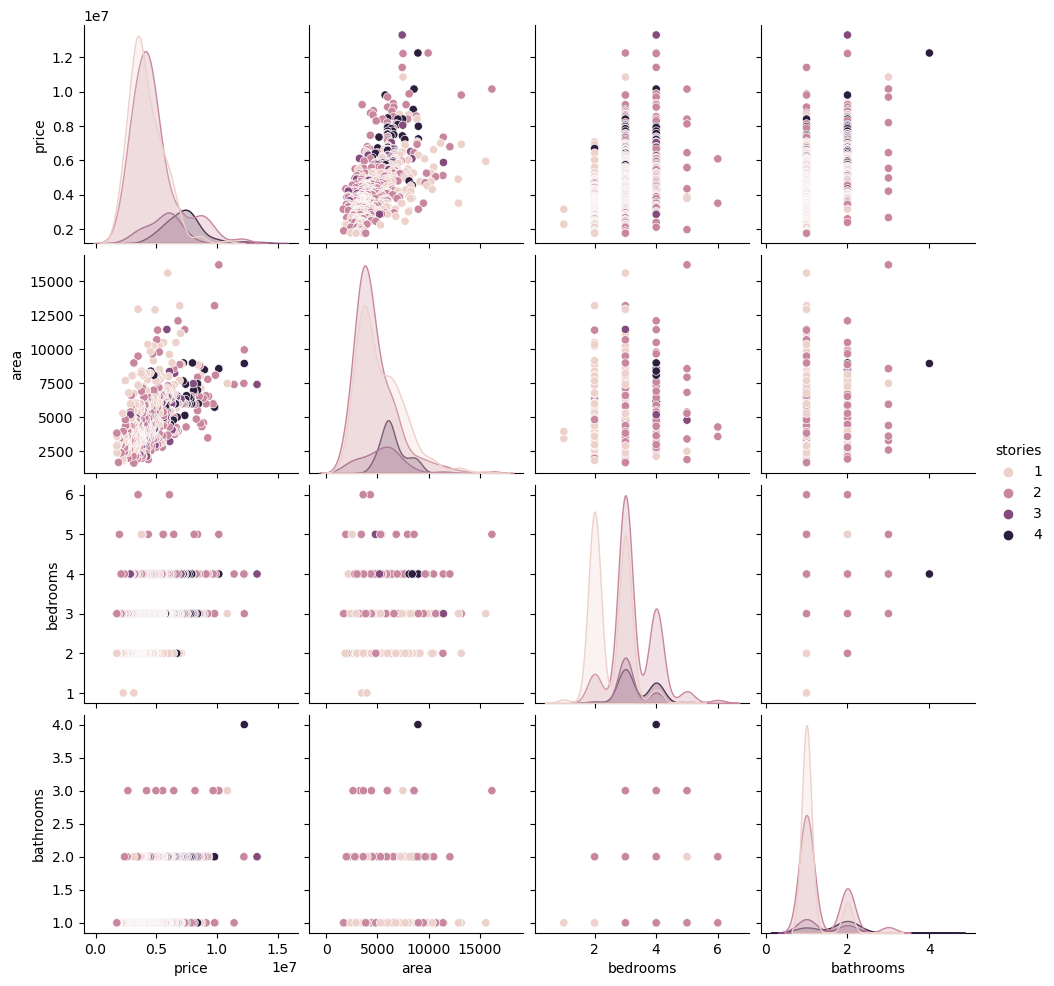

In [15]:
# Pair Plot of Key Features
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']], hue='stories')
plt.show()

# Insights:
- **Sale Price Distribution:** Sale prices are right-skewed, with a significant number of houses priced below the average.
- **Area Correlation:** There is a strong positive correlation between house area and sale price.
- **Furnishing Impact:** Furnishing status impacts sale price, with furnished houses generally fetching higher prices.
- **Bedrooms Effect:** The number of bedrooms shows a moderate correlation with sale price, but it is less influential compared to area.
- **Correlation Matrix:** The correlation heatmap indicates that area and sale price have a strong positive correlation, while the correlation with number of stories is weaker.


### Conclusion:
The analysis reveals that house area and furnishing status are key determinants of sale price. The pair plot and scatter plots provide insights into the relationships between features, suggesting that a larger house area typically results in a higher price. Future analysis could involve more sophisticated statistical models or machine learning techniques to predict prices based on these features.